In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline


# Load the data

In [2]:
df = pd.read_excel(r"C:\Users\Tridev\Desktop\demand.xlsx" ,parse_dates=['date'], index_col='date')

In [3]:
df

,wheat_export,wheat_consumption,population_growth,income_level
date,,,,
1960-01-01,0,14218,445954579,83
1961-01-01,0,13893,456351876,86
1962-01-01,0,14822,467024193,90
1963-01-01,0,16054,477933619,101
1964-01-01,0,16531,489059309,115
...,...,...,...,...
2018-01-01,496,95629,1369003306,1974
2019-01-01,509,95403,1383112050,2047
2020-01-01,2561,102217,1396387127,1910


# Create time series plots

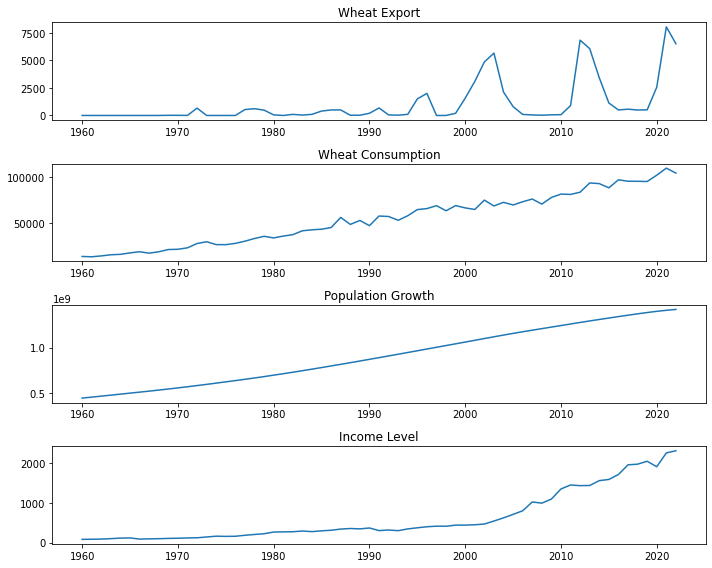

In [4]:
fig, axs = plt.subplots(4, figsize=(10, 8))
axs[0].plot(df['wheat_export'])
axs[0].set_title('Wheat Export')
axs[1].plot(df['wheat_consumption'])
axs[1].set_title('Wheat Consumption')
axs[2].plot(df['population_growth'])
axs[2].set_title('Population Growth')
axs[3].plot(df['income_level'])
axs[3].set_title('Income Level')
plt.tight_layout()
plt.show()


# Test for stationarity

In [5]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

In [6]:
adf_test(df['wheat_export'])
adf_test(df['wheat_consumption'])
adf_test(df['population_growth'])
adf_test(df['income_level'])

ADF Statistic: 0.23910932312210934
p-value: 0.9743717592282244
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
ADF Statistic: 1.2390777882364745
p-value: 0.9962450596242626
Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665
ADF Statistic: -3.4755305261262337
p-value: 0.008638215020536924
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
ADF Statistic: 1.6983851799484542
p-value: 0.998124669874154
Critical Values:
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397


# Perform differencing

In [7]:
df_diff = df.diff().dropna()

In [8]:
adf_test(df_diff['wheat_export'])
adf_test(df_diff['wheat_consumption'])
adf_test(df_diff['income_level'])

ADF Statistic: -4.609318565973733
p-value: 0.00012415643676749155
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
ADF Statistic: -7.1067112814589075
p-value: 4.036051195572659e-10
Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665
ADF Statistic: -0.18423652680131355
p-value: 0.9403746828864836
Critical Values:
   1%: -3.568485864
   5%: -2.92135992
   10%: -2.5986616


# Fit an SARIMAX model

In [95]:
model_consumption = SARIMAX(df['wheat_consumption'], order=(1, 1, 1),
                            exog_vars=[df_diff['income_level'], df['population_growth']]).fit()

C:\Users\Tridev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Tridev\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [99]:
forecast_export = model_consumption.forecast(steps=2)

In [100]:
forecast_export

2023-01-01    105814.110323
2024-01-01    105517.266071
Freq: AS-JAN, Name: predicted_mean, dtype: float64

# Plot the forecasts

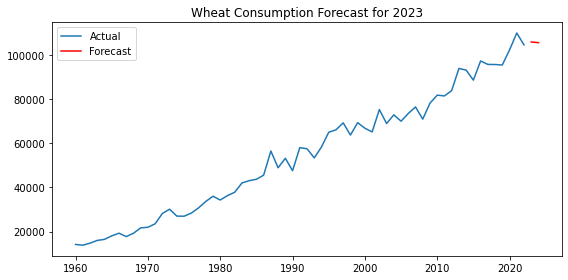

In [101]:
fig, axs = plt.subplots(figsize=(8, 4))
axs.plot(df['wheat_consumption'], label='Actual')
axs.plot(forecast_export, color='r', label='Forecast')
axs.set_title('Wheat Consumption Forecast for 2023')
axs.legend()
plt.tight_layout()
plt.show()